##Import Library

In [53]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

##Load data

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/weather-check/weather-check.csv')
df.drop(columns='RespondentID',inplace=True)

##Rename columns name

In [55]:
df.rename(columns={
    'Do you typically check a daily weather report?': 'weather_check',
    'How do you typically check the weather?':'check_devices',
    'A specific website or app (please provide the answer)':'devices',
    'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?':'smartwatches_check',
    'Age':'age',
    'What is your gender?':'gender',
    'How much total combined money did all members of your HOUSEHOLD earn last year?':'income',
    'US Region':'region'
},inplace = True)

##Clean Data

In [56]:
df

,weather_check,check_devices,devices,smartwatches_check,age,gender,income,region
0,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
...,...,...,...,...,...,...,...,...
923,Yes,The Weather Channel,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
924,Yes,The default weather app on your phone,-,Very likely,30 - 44,Female,Prefer not to answer,South Atlantic
925,Yes,Local TV News,-,Somewhat likely,60+,Female,Prefer not to answer,Pacific
926,No,-,-,-,-,-,-,-


###Clean weather_check column

In [57]:
df['weather_check'].unique()

array(['Yes', 'No'], dtype=object)

In [58]:
df['weather_check'].value_counts()

,count
weather_check,
Yes,746
No,182


In [59]:
df['weather_check'].isnull().sum()

np.int64(0)

###Clean check_devices column

In [60]:
# lower case the data
df['check_devices'] = df['check_devices'].str.lower()

In [61]:
df['check_devices'].unique()

array(['the default weather app on your phone',
       'a specific website or app (please provide the answer)',
       'the weather channel', '-', 'internet search', 'local tv news',
       'newspaper', 'radio weather', 'newsletter'], dtype=object)

In [62]:
# Filter out any rows have keyword "phone" and "app" rename it to Weather app
df['check_devices'] = df['check_devices'].apply(
    lambda x: 'Weather app'
      if 'phone' in x and 'app' in x
      else x
)

# Filter out any rows have keyword "tv news" and "weather channel" rename it to TV News
df['check_devices'] = df['check_devices'].apply(
    lambda x: 'TV News'
      if 'tv news' in x or 'weather channel' in x
      else x
)

# Filter out any rows have keyword "newspaper" and "newsletter" rename it to Newspaper
df['check_devices'] = df['check_devices'].apply(
    lambda x: 'Newspaper'
      if 'newspaper' in x or 'newsletter' in x
      else x
)

# Filter out any rows have keyword "radio" rename it to Radio
df['check_devices'] = df['check_devices'].apply(
    lambda x: 'Radio'
      if 'radio' in x
      else x
)

# Filter out any rows have keyword "internet" rename it to Internet Search
df['check_devices'] = df['check_devices'].apply(
    lambda x: 'Internet Search'
      if 'internet' in x
      else x
)

In [63]:
# Replace '-' with NaN
df['check_devices'] = df['check_devices'].replace('-', np.nan)

In [64]:
df['check_devices'].unique()

array(['Weather app',
       'a specific website or app (please provide the answer)', 'TV News',
       nan, 'Internet Search', 'Newspaper', 'Radio'], dtype=object)

In [65]:
df['check_devices'].value_counts()

,count
check_devices,
TV News,328
Weather app,213
a specific website or app (please provide the answer),175
Internet Search,130
Newspaper,40
Radio,31


###Clean devices column

In [66]:
#lowercase the data
df['devices'] = df['devices'].str.lower()

In [67]:
df['devices'].unique()

array(['-', 'iphone app', 'accuweather app', 'nice', 'weather.com',
       'weatherbug', 'weather channel app', 'yahoo weather iphone',
       'weather puppy', 'accuweather', 'apple weater',
       'the weather channel app', 'google "weather"',
       'weather underground', 'weather timeline (android)', '1 weather',
       'weather underground, also local tv news half the time.',
       'weatherbug app', 'weather bug',
       'fancyclock app on my phone and accuweather.com',
       'goes west satalite', 'intellicast / storm', 'ipod weather ',
       'weatherbug.com', 'iphone weather app', 'www.wunderground.com',
       'the weather channel', 'noaa.gov', '1weather', 'yahoo',
       'weather bug app', 'yo window', 'dark sky', 'aol',
       'noaa and the weather channel', 'weather kitty',
       'internet, tv, radio, newspaper', 'app on iphone', 'yr.no',
       'weatherunderground', 'wunderground.com', 'intellicast',
       'weather risk', 'local newspaper online  weather bug  noah',
    

In [68]:
# filter out any keyword relate to mobile app
# and move it to new columns
keywords = ['phone', 'android', 'apple', 'app', 'iphone', '1 weather', '1weather', 'yo window', 'dark sky', 'weather kitty', 'weather puppy']

df['phone_app'] = df['devices'].apply(
    lambda x: x if any(keyword in x.lower() for keyword in keywords) else None
)

df['devices'] = df['devices'].apply(
    lambda x: None if any(keyword in x.lower() for keyword in keywords) else x
)

In [69]:
# Filter out any rows
df['devices'] = df['devices'].apply(
    lambda x: 'wunderground.com'
      if x is not None and ('underground' in x or 'wunderground' in x)
      else x
)

df['devices'] = df['devices'].apply(
    lambda x: 'weatherbug.com'
      if x is not None and ('weatherbug' in x or 'weather bug' in x)
      else x
)

df['devices'] = df['devices'].apply(
    lambda x: 'weather.com'
      if x is not None and ('weather.com' in x or 'weather channel' in x)
      else x
)

df['devices'] = df['devices'].apply(
    lambda x: 'accuweather.com'
      if x is not None and ('accuweather' in x)
      else x
)

df['devices'] = df['devices'].apply(
    lambda x: 'google.com'
      if x is not None and ('google' in x)
      else x
)

df['devices'] = df['devices'].apply(
    lambda x: 'noaa.gov'
      if x is not None and ('noaa' in x)
      else x
)

df['devices'] = df['devices'].apply(
    lambda x: 'weather.gov'
      if x is not None and ('weather.gov' in x or 'national weather service' in x)
      else x
)

df['devices'] = df['devices'].apply(
    lambda x: 'yahoo.com'
      if x is not None and ('yahoo' in x)
      else x
)

# Filter out any rows
df['devices'] = df['devices'].apply(
    lambda x: 'intellicast.com'
      if x is not None and ('intellicast' in x)
      else x
)

# Filter out any rows
df['devices'] = df['devices'].apply(
    lambda x: 'aol.com'
      if x is not None and ('aol' in x)
      else x
)

# Filter out any rows
df['devices'] = df['devices'].apply(
    lambda x: 'nbcwashington.com'
      if x is not None and ('storm team 4' in x)
      else x
)

# Filter out any rows
df['devices'] = df['devices'].apply(
    lambda x: 'krca.com'
      if x is not None and ('kcra' in x)
      else x
)

# Filter out any rows
df['devices'] = df['devices'].apply(
    lambda x: 'msn.com'
      if x is not None and ('bing' in x)
      else x
)
# Filter out any rows
df['devices'] = df['devices'].apply(
    lambda x: 'None'
      if x is not None and ('my husband' in x)
      else x
)

# Filter out any rows
df['devices'] = df['devices'].apply(
    lambda x: 'None'
      if x is not None and ('my mother' in x)
      else x
)


pattern = r'\.'
df['devices'] = np.where(df['devices'].str.contains(pattern, na=False),df['devices'],np.nan)

In [70]:
df['devices'].unique()

array([nan, 'weather.com', 'weatherbug.com', 'accuweather.com',
       'google.com', 'wunderground.com', 'intellicast.com', 'noaa.gov',
       'yahoo.com', 'aol.com', 'yr.no', 'nbcwashington.com', 'krca.com',
       'weatherforyou.com', 'weather.gov', 'msn.com'], dtype=object)

In [71]:
df

,weather_check,check_devices,devices,smartwatches_check,age,gender,income,region,phone_app
0,Yes,Weather app,NaN,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic,None
1,Yes,Weather app,NaN,Very likely,18 - 29,Male,Prefer not to answer,-,None
2,Yes,Weather app,NaN,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic,None
3,Yes,Weather app,NaN,Somewhat likely,30 - 44,Male,Prefer not to answer,-,None
4,Yes,a specific website or app (please provide the ...,NaN,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic,iphone app
...,...,...,...,...,...,...,...,...,...
923,Yes,TV News,NaN,Very likely,45 - 59,Female,Prefer not to answer,Pacific,None
924,Yes,Weather app,NaN,Very likely,30 - 44,Female,Prefer not to answer,South Atlantic,None
925,Yes,TV News,NaN,Somewhat likely,60+,Female,Prefer not to answer,Pacific,None
926,No,NaN,NaN,-,-,-,-,-,None


### Clean smartwatch_check column

In [72]:
df['smartwatches_check'] = df['smartwatches_check'].replace('-', np.nan)

In [73]:
df['smartwatches_check'].value_counts()

,count
smartwatches_check,
Very likely,362
Somewhat likely,274
Very unlikely,208
Somewhat unlikely,73


### Clean age column

In [74]:
df['age'] = df['age'].replace('-', np.nan)

In [75]:
df['age'].value_counts()

,count
age,
45 - 59,278
60+,258
30 - 44,204
18 - 29,176


###Clean gender column

In [76]:
df['gender'] = df['gender'].replace('-', np.nan)

In [77]:
df['gender'].value_counts()

,count
gender,
Female,527
Male,389


###Clean income column

In [78]:
df['income'] = df['income'].replace('-', np.nan)
df['income'] = df['income'].replace('Prefer not to answer', np.nan)

In [79]:
df['income'].value_counts()

,count
income,
"$25,000 to $49,999",132
"$50,000 to $74,999",111
"$100,000 to $124,999",104
"$75,000 to $99,999",104
"$10,000 to $24,999",81
"$200,000 and up",58
"$125,000 to $149,999",49
"$0 to $9,999",45
"$150,000 to $174,999",39


###Clean region column

In [80]:
df['region'] = df['region'].replace('-', np.nan)

In [81]:
df['region'].value_counts()

,count
region,
Pacific,185
South Atlantic,154
East North Central,141
Middle Atlantic,104
West South Central,94
Mountain,72
West North Central,54
New England,52
East South Central,41


In [82]:
df

,weather_check,check_devices,devices,smartwatches_check,age,gender,income,region,phone_app
0,Yes,Weather app,NaN,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic,None
1,Yes,Weather app,NaN,Very likely,18 - 29,Male,NaN,NaN,None
2,Yes,Weather app,NaN,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic,None
3,Yes,Weather app,NaN,Somewhat likely,30 - 44,Male,NaN,NaN,None
4,Yes,a specific website or app (please provide the ...,NaN,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic,iphone app
...,...,...,...,...,...,...,...,...,...
923,Yes,TV News,NaN,Very likely,45 - 59,Female,NaN,Pacific,None
924,Yes,Weather app,NaN,Very likely,30 - 44,Female,NaN,South Atlantic,None
925,Yes,TV News,NaN,Somewhat likely,60+,Female,NaN,Pacific,None
926,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


###Final Clean and Organize

In [83]:
df.loc[df['devices'].notna(), 'check_devices'] = 'Website'

df.loc[df['phone_app'].notna(), 'check_devices'] = 'Weather app'

In [84]:
columns = df.columns.tolist()

columns.insert(columns.index('check_devices') + 1, columns.pop(columns.index('phone_app')))

df = df[columns]


In [85]:
df.rename(columns={'devices': 'website'}, inplace=True)

In [86]:
value_to_remove = 'a specific website or app (please provide the answer)'
df = df[df['check_devices'] != value_to_remove]

In [87]:
df = df.drop(columns=['weather_check'])

In [88]:
df['income'] = df['income'].str.replace("to", "-", regex=False)
df['income'] = df['income'].str.replace("and up", "+", regex=False)

In [89]:
df['income'].value_counts()

,count
income,
"$25,000 - $49,999",130
"$50,000 - $74,999",107
"$100,000 - $124,999",104
"$75,000 - $99,999",103
"$10,000 - $24,999",81
"$200,000 +",57
"$125,000 - $149,999",48
"$0 - $9,999",45
"$150,000 - $174,999",38


##Analyze correlations between weather-checking frequency and demographics such as age, region, and income level.

###How people check the weather

In [90]:
region_counts = df['check_devices'].value_counts().reset_index()
region_counts.columns = ['check_devices', 'count']

# Bar chart
fig = px.bar(region_counts, x='check_devices',
             y='count',
             color='check_devices',
             title="The number of people with check_devices	"
)
fig.update_layout(
    xaxis_title="check_devices	",
    yaxis_title="Number of People",
    width=800,
    height=600
)
fig.show()

###Where people take datasets come from?

In [91]:
region_counts = df['region'].value_counts().reset_index()
region_counts.columns = ['region', 'count']

# Bar chart
fig = px.bar(region_counts, x='region', y='count', color='region',
             title="The number of people with region")
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Number of People",
    width=800,
    height=600
)
fig.show()

<Figure size 2000x1500 with 0 Axes>

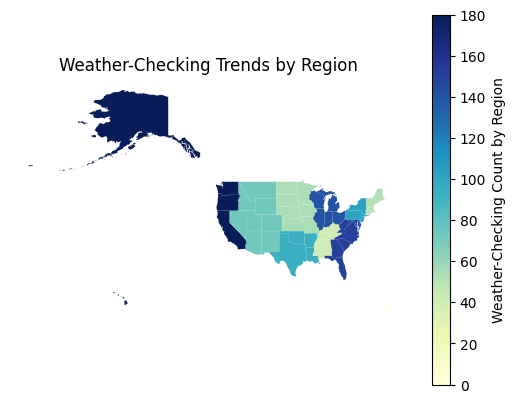

In [92]:
region_to_states = {
    "Pacific": ["California", "Oregon", "Washington", "Alaska", "Hawaii"],
    "South Atlantic": ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", "West Virginia"],
    "East North Central": ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin"],
    "Middle Atlantic": ["New Jersey", "New York", "Pennsylvania"],
    "West South Central": ["Arkansas", "Louisiana", "Oklahoma", "Texas"],
    "Mountain": ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming"],
    "West North Central": ["Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota"],
    "New England": ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont"],
    "East South Central": ["Alabama", "Kentucky", "Mississippi", "Tennessee"]
}
state_data = []
for region, states in region_to_states.items():
    count = df[df['region'] == region]['region'].count()
    for state in states:
        state_data.append({'state': state, 'count': count})

state_df = pd.DataFrame(state_data)

us_states_url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
states = gpd.read_file(us_states_url)

merged = states.merge(state_df, left_on='name', right_on='state', how='left')
merged['count'] = merged['count'].fillna(0)

plt.figure(figsize=(20, 15))
merged.plot(
    column='count',
    cmap='YlGnBu',
    legend=True,
    legend_kwds={'label': "Weather-Checking Count by Region"}
)
plt.title('Weather-Checking Trends by Region')  # Increase title font size
plt.axis('off')  # Remove axes
plt.show()

###The relationship between age and weather check

In [93]:
age_counts = df['age'].value_counts().reset_index()
age_counts.columns = ['age', 'weather_check']

fig = px.pie(
    age_counts,
    values='weather_check',
    names='age',
    title="Distribution of Weather Check by Age Group",
    color_discrete_sequence=px.colors.qualitative.G10,
    category_orders={'age': ['18 - 29', '30 - 44', '45 - 59', '60+']}
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

###The relationship between income and weather check

In [94]:
income_order = [
    "$0 - $9,999",
    "$10,000 - $24,999",
    "$25,000 - $49,999",
    "$50,000 - $74,999",
    "$75,000 - $99,999",
    "$100,000 - $124,999",
    "$125,000 - $149,999",
    "$150,000 - $174,999",
    "$175,000 - $199,999",
    "$200,000 +"
]

income_counts = df['income'].value_counts().reset_index()
income_counts.columns = ['income', 'weather_check']

income_counts['income'] = pd.Categorical(income_counts['income'], categories=income_order, ordered=True)
income_counts = income_counts.sort_values('income')

fig = px.bar(
    income_counts,
    x='income',
    y='weather_check',
    title="Distribution of Weather Check by Income Group",
    color='income',
    color_discrete_sequence=px.colors.qualitative.G10
)

fig.update_layout(
    xaxis_title="Income Group",
    yaxis_title="Count of Weather Checks",
    xaxis_tickangle=45,
    width=1000,
    height=500,
)

fig.show()

##Identify demographic trends in weather-checking methods, focusing on age, gender, income level, and regional differences.

###Age and Weather-Checking Methods

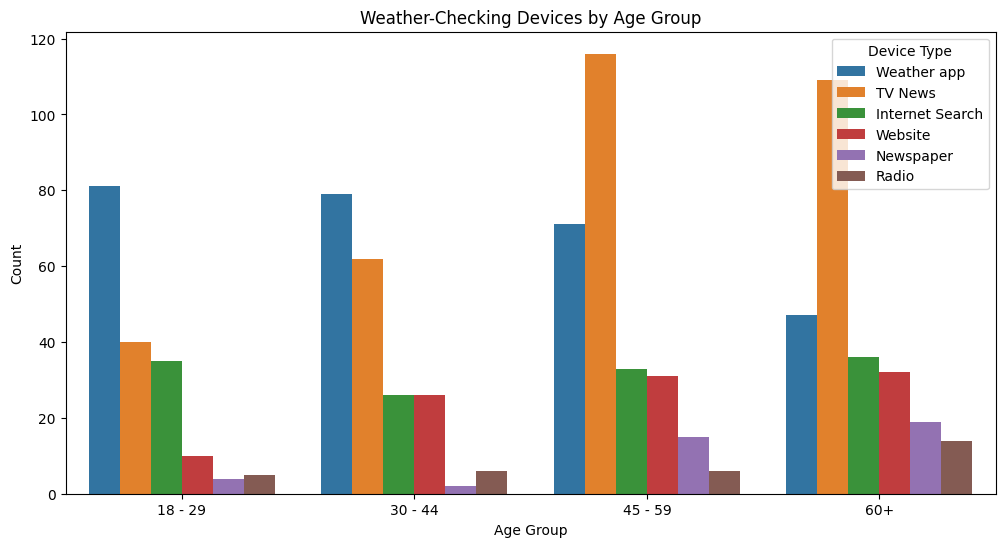

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = df[df['check_devices'].notnull()]

category_orders = ['18 - 29', '30 - 44', '45 - 59', '60+']


plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='age', hue='check_devices', order=category_orders)
plt.title('Weather-Checking Devices by Age Group')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Device Type')
plt.show()



###Gender and Weather-Checking Methods

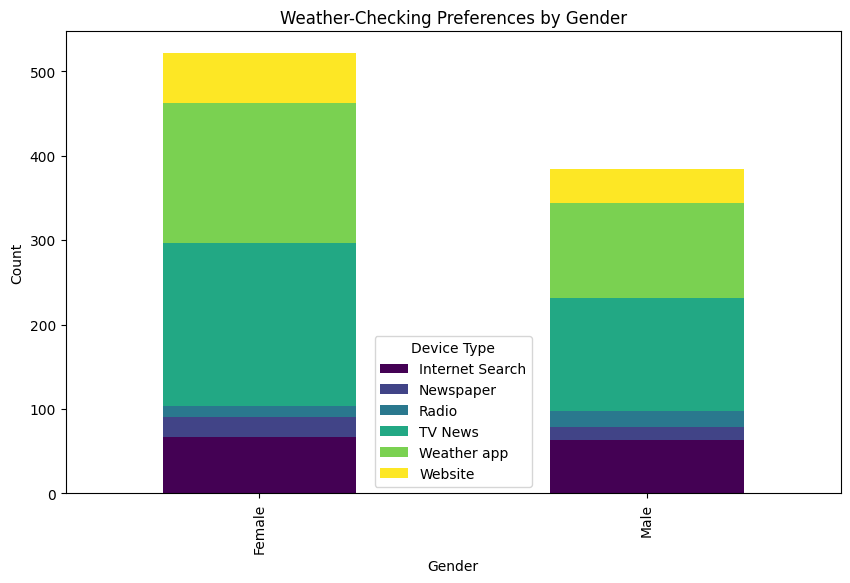

In [96]:
gender_data = filtered_df.groupby(['gender', 'check_devices']).size().unstack(fill_value=0)

gender_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Weather-Checking Preferences by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Device Type')
plt.show()


###Income Level and Weather-Checking Methods

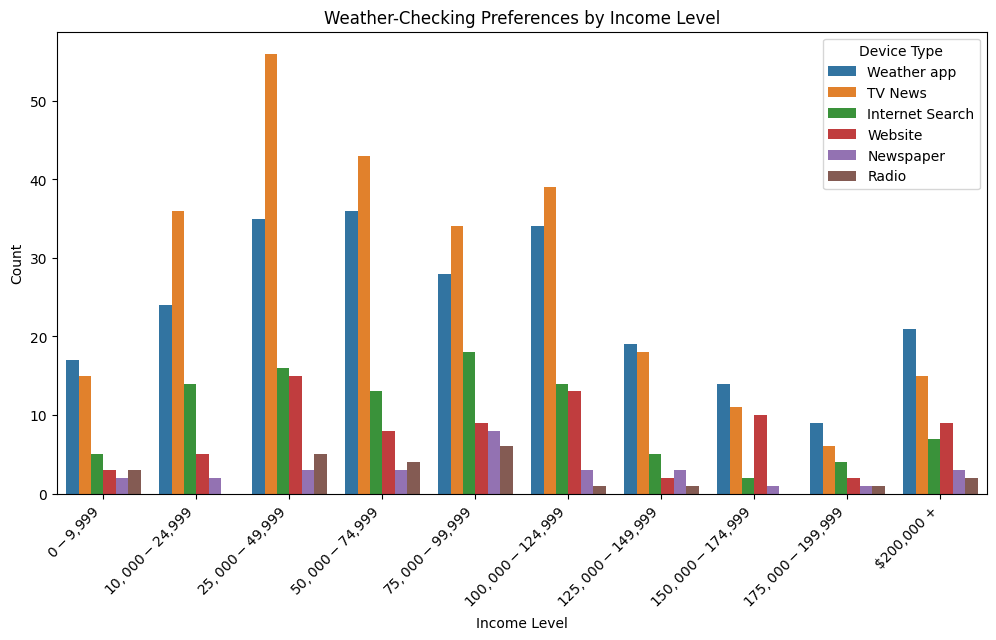

In [97]:
income_order = [
    "$0 - $9,999",
    "$10,000 - $24,999",
    "$25,000 - $49,999",
    "$50,000 - $74,999",
    "$75,000 - $99,999",
    "$100,000 - $124,999",
    "$125,000 - $149,999",
    "$150,000 - $174,999",
    "$175,000 - $199,999",
    "$200,000 +"
]
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='income', hue='check_devices', order=income_order)
plt.title('Weather-Checking Preferences by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Device Type')
plt.show()


###Regions and Weather-Checking Methods

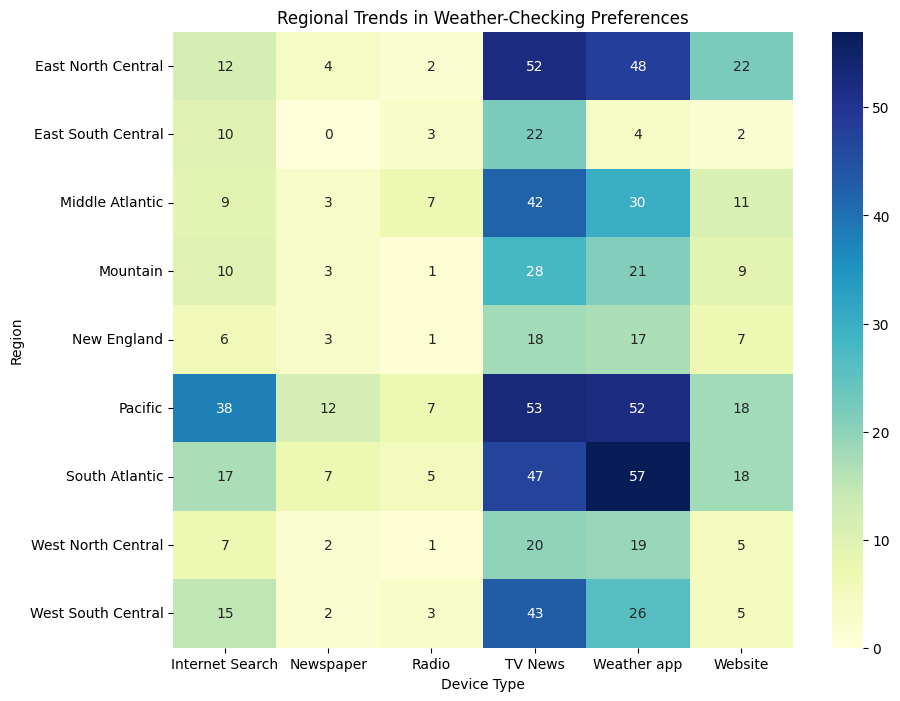

In [98]:
region_data = filtered_df.groupby(['region', 'check_devices']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(region_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Regional Trends in Weather-Checking Preferences')
plt.xlabel('Device Type')
plt.ylabel('Region')
plt.show()


## 7. Do smartwatches make people check weather more frequently? (easy access)

In [99]:
smartwatch_weather = df.copy()

smartwatch_weather.columns = smartwatch_weather.columns.str.strip()

smartwatch_weather['smartwatches_check'] = pd.Categorical(
    smartwatch_weather['smartwatches_check'],
    categories=["Very unlikely", "Somewhat unlikely", "Somewhat likely", "Very likely"],
    ordered=True
)


bar_chart_data = (
    smartwatch_weather.groupby(['smartwatches_check', 'check_devices'])
    .size()
    .reset_index(name='count')
)


fig = px.bar(
    bar_chart_data,
    x='count',
    y='smartwatches_check',
    color='check_devices',
    orientation='h',
    labels={
        'smartwatches_check': 'Smartwatch Likelihood',
        'count': 'Number of Respondents',
        'check_devices': 'Weather-Checking Method'
    },
    title="Impact of Smartwatches on Weather-Checking Methods",
    text='count'
)


fig.update_layout(
    yaxis=dict(
        categoryorder='array',
        categoryarray=["Very unlikely", "Somewhat unlikely", "Somewhat likely", "Very likely"]
    ),
    xaxis_title="Number of Respondents",
    yaxis_title="Smartwatch Likelihood",
    legend_title="Weather-Checking Method",
    hovermode="y"
)

fig.show()

/tmp/ipython-input-1096575937.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [107]:
smartwatch_df = df.copy()


## 8. Do young people prefer to use smartwatches to check weather more than elderly?

/tmp/ipython-input-1220467725.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



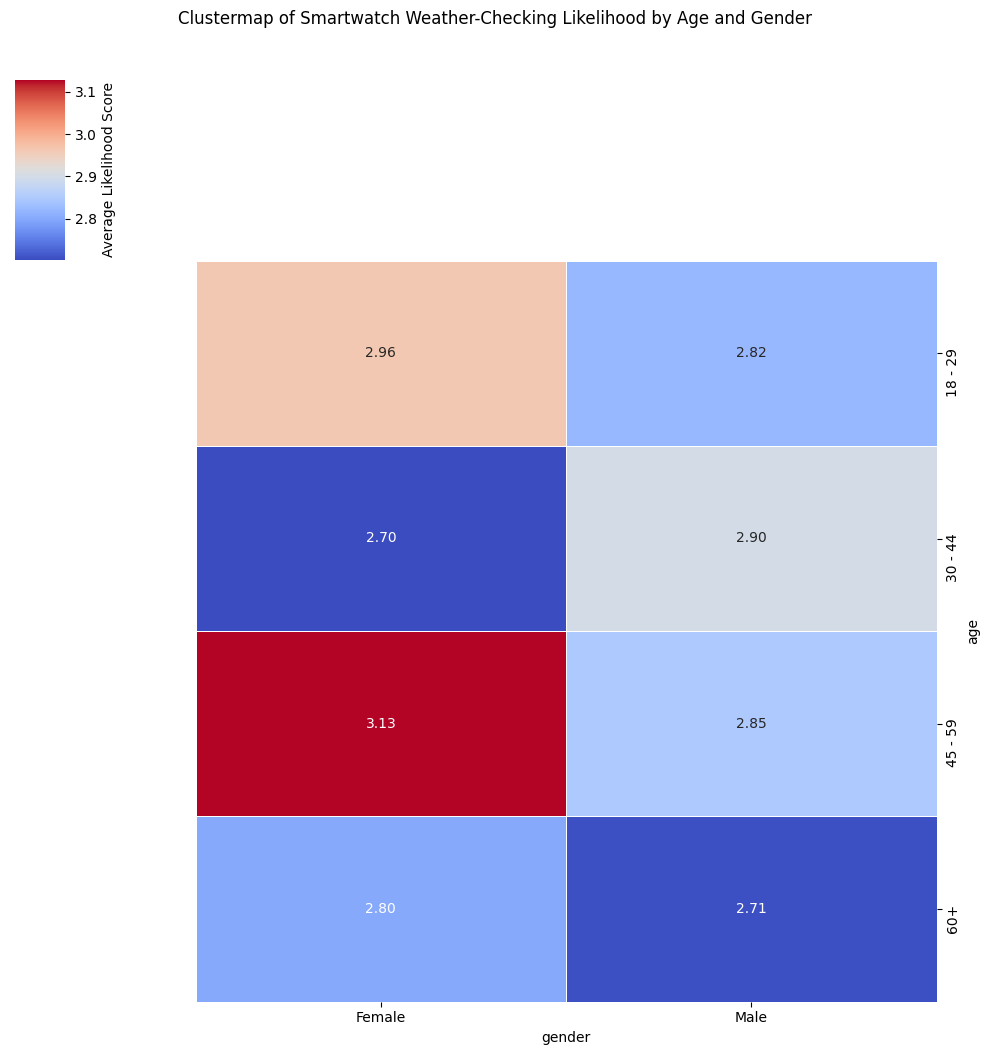

In [108]:
age_order = ["18 - 29", "30 - 44", "45 - 59", "60+"]


smartwatch_df['age'] = pd.Categorical(smartwatch_df['age'], categories=age_order, ordered=True)
smartwatch_df = smartwatch_df.sort_values(by='age')


likelihood_map = {
    "Very unlikely": 1,
    "Somewhat unlikely": 2,
    "Somewhat likely": 3,
    "Very likely": 4
}
smartwatch_df['smartwatches_check_score'] = smartwatch_df['smartwatches_check'].map(likelihood_map)


clustermap_data = (
    smartwatch_df.groupby(['age', 'gender'])['smartwatches_check_score']
    .mean()
    .unstack()
)

#
g = sns.clustermap(
    clustermap_data,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    cbar_kws={'label': 'Average Likelihood Score'},
    linewidths=0.5,
    col_cluster=False,
    row_cluster=False
)

g.fig.suptitle("Clustermap of Smartwatch Weather-Checking Likelihood by Age and Gender", y=1.05)
plt.show()
